In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
import torch
import pandas as pd
from copy import deepcopy
from tqdm import tqdm
import numpy as np 
import matplotlib.pyplot as plt 
from training_new import get_data_loaders, train, get_solution_instances
from model import Model, DummyModel
from inference import greedy_inference_single, beam_inference_single
from util import create_graph_no_sol

In [3]:
graphs_path = "./solver/sol_examples/vrp20/sols.pkl"

In [4]:
train_dl, valid_dl, _ = get_data_loaders(graphs_path, batch_size=5, max_instances=15)

Parsing Graphs: 100%|███████████████████████████| 15/15 [00:00<00:00, 75.63it/s]


In [5]:
torch.manual_seed(13)
model = Model(4, 20, 2, 0.0)
stats_df = train(model, "./solver/sol_examples/vrp20/sols.pkl", epochs=25, 
                 batch_size=16, learning_rate=3e-3, max_instances=2000, 
                 max_inference_graphs=100)

Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 257.01it/s]


Train 0 - loss:1.1229, acc:0.6147
Valid 0 - loss:0.9788, acc:0.6765, eval_avg_cost:7.4994


Batches: 100%|█████████████████████████████| 2285/2285 [00:09<00:00, 242.12it/s]


Train 1 - loss:0.9583, acc:0.6739
Valid 1 - loss:0.9689, acc:0.6818, eval_avg_cost:7.4247


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 266.43it/s]


Train 2 - loss:0.9409, acc:0.6822
Valid 2 - loss:0.9653, acc:0.6845, eval_avg_cost:7.4338


Batches: 100%|█████████████████████████████| 2285/2285 [00:10<00:00, 224.80it/s]


Train 3 - loss:0.9305, acc:0.6814
Valid 3 - loss:0.9456, acc:0.6845, eval_avg_cost:7.5160


Batches: 100%|█████████████████████████████| 2285/2285 [00:09<00:00, 251.07it/s]


Train 4 - loss:0.9208, acc:0.6860
Valid 4 - loss:0.9502, acc:0.6853, eval_avg_cost:7.4836


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 264.06it/s]


Train 5 - loss:0.9131, acc:0.6877
Valid 5 - loss:0.9431, acc:0.6883, eval_avg_cost:7.5516


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 262.30it/s]


Train 6 - loss:0.9061, acc:0.6922
Valid 6 - loss:0.9333, acc:0.6859, eval_avg_cost:7.5219


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 264.52it/s]


Train 7 - loss:0.8990, acc:0.6936
Valid 7 - loss:0.9275, acc:0.6892, eval_avg_cost:7.4154


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 255.41it/s]


Train 8 - loss:0.8946, acc:0.6946
Valid 8 - loss:0.9315, acc:0.6868, eval_avg_cost:7.4366


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 262.58it/s]


Train 9 - loss:0.8895, acc:0.6962
Valid 9 - loss:0.9414, acc:0.6895, eval_avg_cost:7.4353


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 264.10it/s]


Train 10 - loss:0.8843, acc:0.6955
Valid 10 - loss:0.9338, acc:0.6900, eval_avg_cost:7.4065


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 262.36it/s]


Train 11 - loss:0.8821, acc:0.6963
Valid 11 - loss:0.9299, acc:0.6845, eval_avg_cost:7.3904


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 263.22it/s]


Train 12 - loss:0.8789, acc:0.6987
Valid 12 - loss:0.9308, acc:0.6909, eval_avg_cost:7.4271


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 261.59it/s]


Train 13 - loss:0.8771, acc:0.6973
Valid 13 - loss:0.9322, acc:0.6939, eval_avg_cost:7.3866


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 262.94it/s]


Train 14 - loss:0.8745, acc:0.6997
Valid 14 - loss:0.9382, acc:0.6906, eval_avg_cost:7.4367


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 261.64it/s]


Train 15 - loss:0.8757, acc:0.6976
Valid 15 - loss:0.9364, acc:0.6883, eval_avg_cost:7.3888


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 254.57it/s]


Train 16 - loss:0.8709, acc:0.7002
Valid 16 - loss:0.9458, acc:0.6848, eval_avg_cost:7.4073


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 267.43it/s]


Train 17 - loss:0.8697, acc:0.7008
Valid 17 - loss:0.9266, acc:0.6901, eval_avg_cost:7.4857


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 260.53it/s]


Train 18 - loss:0.8663, acc:0.7024
Valid 18 - loss:0.9382, acc:0.6853, eval_avg_cost:7.4139


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 264.24it/s]


Train 19 - loss:0.8665, acc:0.7030
Valid 19 - loss:0.9164, acc:0.6925, eval_avg_cost:7.3684


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 255.64it/s]


Train 20 - loss:0.8641, acc:0.7017
Valid 20 - loss:0.9304, acc:0.6932, eval_avg_cost:7.4157


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 263.40it/s]


Train 21 - loss:0.8617, acc:0.7030
Valid 21 - loss:0.9234, acc:0.6912, eval_avg_cost:7.4538


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 265.27it/s]


Train 22 - loss:0.8605, acc:0.7041
Valid 22 - loss:0.9334, acc:0.6926, eval_avg_cost:7.4446


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 269.20it/s]


Train 23 - loss:0.8598, acc:0.7037
Valid 23 - loss:0.9280, acc:0.6936, eval_avg_cost:7.3596


Batches: 100%|█████████████████████████████| 2285/2285 [00:08<00:00, 268.30it/s]


Train 24 - loss:0.8589, acc:0.7056
Valid 24 - loss:0.9291, acc:0.6896, eval_avg_cost:7.4179


In [12]:
stats_df_new = deepcopy(stats_df)

<Axes: xlabel='epoch'>

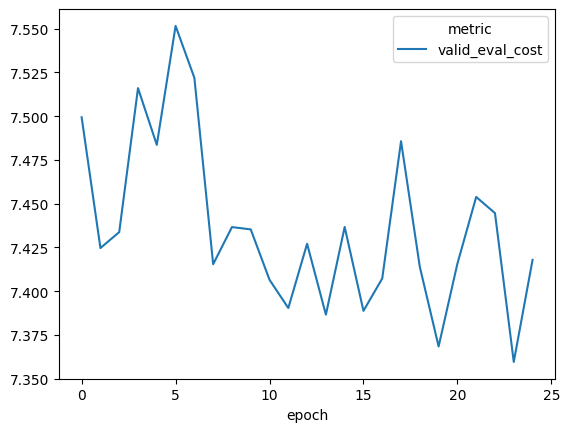

In [13]:
stats_df[["valid_eval_cost"]].plot()

In [14]:
stats_df = stats_df.set_index(["metric", "epoch"]).unstack("metric")["value"]

KeyError: "None of ['metric', 'epoch'] are in the columns"

In [15]:
def remove_handles(ax):
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[0:], labels=labels[0:])
    
    return ax 

fig = plt.figure(figsize=(16, 4))
axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)


axes1.set_xlabel("epochs")
axes2.set_xlabel("epochs")
axes3.set_xlabel("epochs")

axes3.set_ylabel("Total travel cost")
axes1.set_ylabel("Accuracy")
axes2.set_ylabel("CE Loss")

color = {"training":"orange", "validation":"blue"}

df_acc = stats_df_new[["train_acc", "valid_acc"]].rename({"train_acc":"training", 
                                                            "valid_acc":"validation"}, axis=1)
df_loss = stats_df_new[["train_loss", "valid_loss"]].rename({"train_loss":"training", 
                                                            "valid_loss":"validation"}, axis=1)
df_cost = stats_df_new[["valid_eval_cost"]].rename({"valid_eval_cost": "validation"}, axis=1)

df_acc[["training", "validation"]].plot(ax=axes1, color=color)
df_loss[["training", "validation"]].plot(ax=axes2, color=color)
df_cost[["validation"]].plot(ax=axes3, color=color)


remove_handles(axes1)
remove_handles(axes2)
remove_handles(axes3)

fig.savefig("training_plots.png", bbox_inches="tight", dpi=300)
plt.close()

In [16]:
stats_df[["train_acc", "valid_acc"]].plot(ax=axes1)
stats_df[["train_loss", "valid_loss"]].plot(ax=axes2)
stats_df[["valid_eval_cost"]].plot(ax=axes3)

<Axes: xlabel='epoch', ylabel='Total travel cost'>

<Axes: xlabel='epoch'>

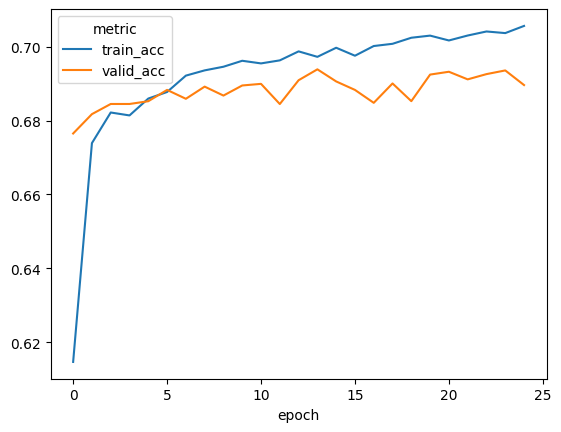

In [17]:
stats_df[["train_acc", "valid_acc"]].plot()

<Axes: xlabel='epoch'>

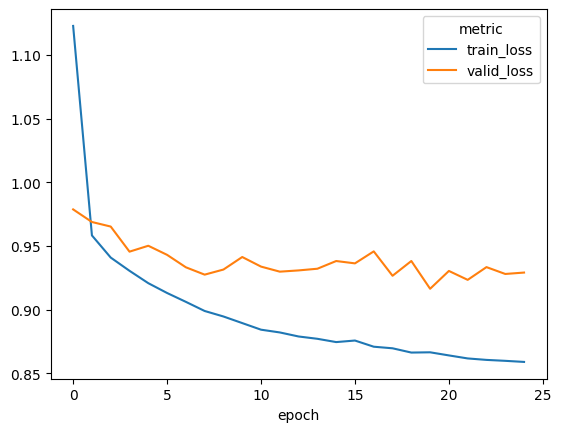

In [18]:
stats_df[["train_loss", "valid_loss"]].plot()

In [19]:
graphs = pd.read_pickle(graphs_path)

In [20]:
graph_collections = [create_graph_no_sol(g) for g, _ in graphs]

In [21]:
import torch
import pandas as pd
from copy import deepcopy
from tqdm import tqdm

from training_new import get_data_loaders, train
from model import Model, DummyModel
from inference import greedy_inference_single, beam_inference_single
from util import create_graph_no_sol

In [22]:
solved_graphs = []
for g, orig_g in tqdm(list(zip(graph_collections, graphs))[0:1]):
    g = deepcopy(graph_collections[0])
    g = deepcopy(g)
    # g.update_node(orig_g[1][1][0]) # unf we have to do this for now
    res_g = beam_inference_single(model, g)
    solved_graphs.append(res_g)

  0%|                                                     | 0/1 [00:00<?, ?it/s]/Users/sawal/Desktop/cs224w_project/cs224w/graph.py:151: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3618.)
  edge_list = torch.LongTensor(edge_list).T


finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10


100%|█████████████████████████████████████████████| 1/1 [00:05<00:00,  5.08s/it]

finished 1
10
finished 8
9
finished 1
1


saved


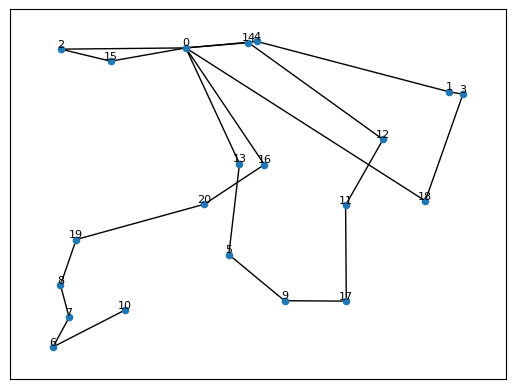

In [25]:
fig = plt.figure()
axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_title("Beam Search Solution")
axes2.set_title("Greedy Search Solution")
axes3.set_title("True Solution")

saved


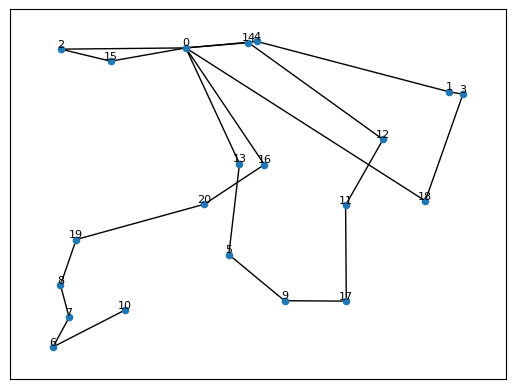

In [29]:
beam_solution = solved_graphs[0].get_all_graphs()[-1]
beam_solution.draw_graph(name= "beam_solution", labels=True)

saved


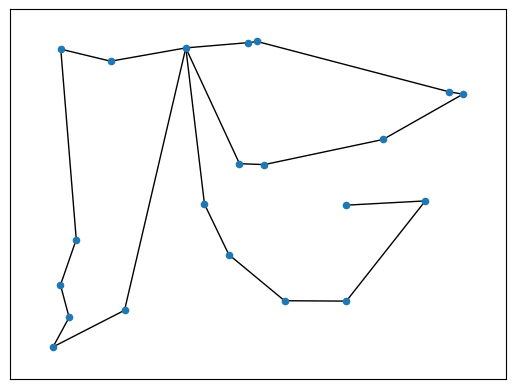

In [32]:
all_true_solutions = get_solution_instances(graphs_path, max_instances=100)[0]
true_solution0 = all_true_solutions[0]
last_graph = true_solution0.get_all_graphs()[-1]
last_graph.draw_graph(name="true_solution")

In [36]:
graphs = pd.read_pickle(graphs_path)

In [37]:
graph_collections = [create_graph_no_sol(g) for g, _ in graphs]

In [38]:
import torch
import pandas as pd
from copy import deepcopy
from tqdm import tqdm

from training_new import get_data_loaders, train
from model import Model, DummyModel
from inference import greedy_inference_single, beam_inference_single
from util import create_graph_no_sol

In [39]:
solved_graphs = []
for g, orig_g in tqdm(list(zip(graph_collections, graphs))[0:1]):
    g = deepcopy(graph_collections[0])
    g = deepcopy(g)
    g.update_node(orig_g[1][1][0]) # unf we have to do this for now
    res_g = beam_inference_single(model, g)
    solved_graphs.append(res_g)

  0%|                                                     | 0/1 [00:00<?, ?it/s]

finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10


100%|█████████████████████████████████████████████| 1/1 [00:05<00:00,  5.34s/it]

finished 1
10
finished 9
9


In [40]:
solved_graphs[0].get_full_solution_cost()

6.681516079915688

In [41]:
example_g = solved_graphs[0].get_all_graphs()[-1]

saved


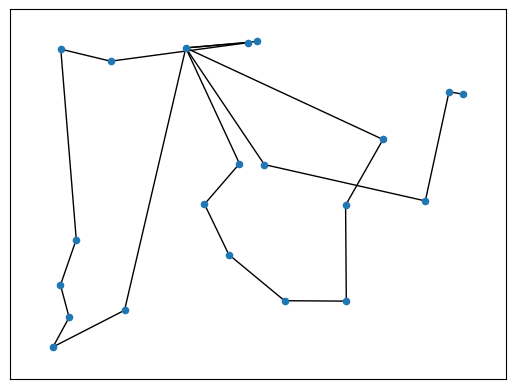

In [44]:
example_g.draw_graph(name="greedy_solution")

In [ ]:
np.mean([sg.get_full_solution_cost() for sg in solved_graphs])

## Solving graphs

In [ ]:
import torch
import pandas as pd
from copy import deepcopy
from tqdm import tqdm

from training_new import get_data_loaders, train
from model import Model, DummyModel
from inference import greedy_inference_single
from util import create_graph_no_sol

In [ ]:
graphs_path = "./solver/sol_examples/vrp20/sols.pkl"

In [ ]:
train_dl, valid_dl = get_data_loaders(graphs_path, batch_size=5, max_instances=20)

In [ ]:
model = Model(4, 20, 2, 0.0)
train(model, "./solver/sol_examples/vrp20/sols.pkl", epochs=5, batch_size=16, learning_rate=3e-3, max_instances=2000)

In [ ]:
graphs = pd.read_pickle(graphs_path)

In [ ]:
graph_collections = [create_graph_no_sol(g) for g, _ in graphs]

In [ ]:
solved_graphs = []
for g, orig_g in tqdm(list(zip(graph_collections, graphs))[:100]):
    g = deepcopy(graph_collections[0])
    g = deepcopy(g)
    g.update_node(orig_g[1][1][0]) # unf we have to do this for now
    res_g = greedy_inference_single(model, g)
    solved_graphs.append(res_g)

In [ ]:
solved_graphs[0].get_full_solution_cost()

In [ ]:
np.mean([sg.get_full_solution_cost() for sg in solved_graphs])